# Mini Project using ML Foundations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset Shape:", X.shape)
print()
print("Target Classes:", cancer.target_names)
print()
print("First 5 Rows:")
display(X.head())



Dataset Shape: (569, 30)

Target Classes: ['malignant' 'benign']

First 5 Rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA & Visualization


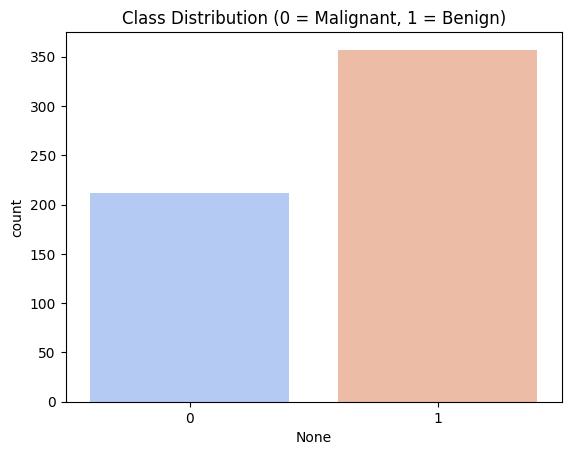

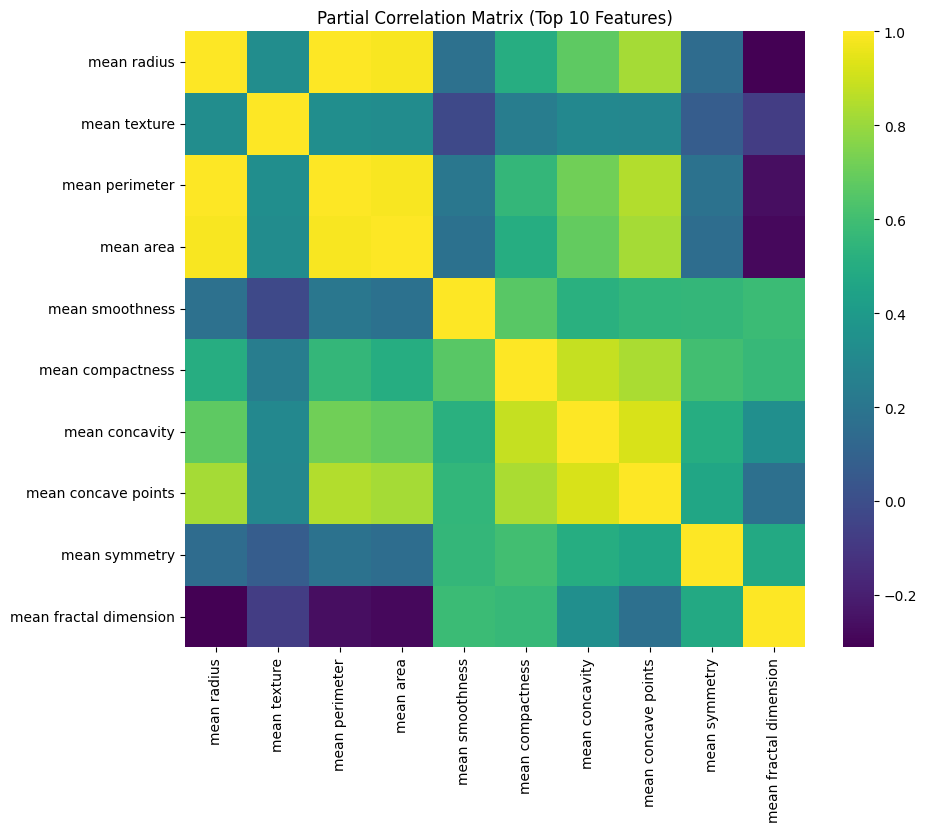

In [3]:
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr.iloc[:10, :10], cmap="viridis", annot=False)
plt.title("Partial Correlation Matrix (Top 10 Features)")
plt.show()

## Data Preprocessing

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 426
Testing Samples: 143


## Logistic Regression Model


Logistic Regression Results:
Accuracy: 0.986013986013986
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



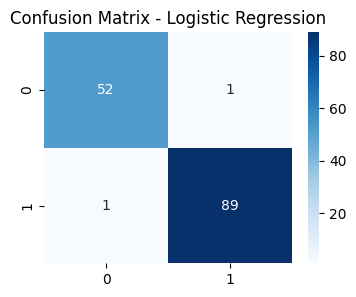

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Random Forest Model

Random Forest Results:
Accuracy: 0.958041958041958
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



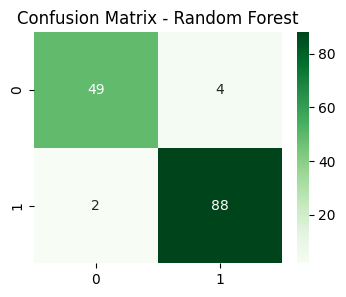

In [7]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Cross-Validation & Feature Importance

Average CV Accuracy: 0.9578


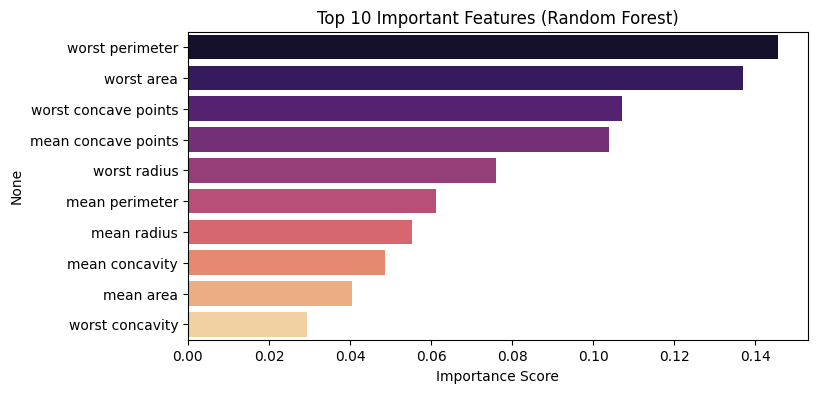

In [8]:
cv_scores = cross_val_score(rf_clf, X_scaled, y, cv=5)
print("Average CV Accuracy:", np.mean(cv_scores).round(4))

# Feature Importance
feat_imp = pd.Series(rf_clf.feature_importances_, index=cancer.feature_names).sort_values(ascending=False)[:10]
plt.figure(figsize=(8,4))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="magma")
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()